In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [ ]:
#MNIST 데이터셋 다운 및 로드드

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# 데이터 분할 확인
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


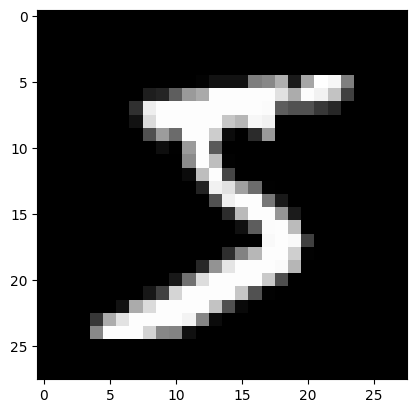

In [ ]:
# 손글씨 숫자 이미지 크기 확인인

image = train_x[0]
print(image.shape)

plt.imshow(image, 'gray')
plt.show()

In [ ]:
# 데이터 정규화
from tensorflow.keras.utils import to_categorical

train_x = train_x.reshape(-1,28,28,1)/255.
test_x = test_x.reshape(-1,28,28,1)/255.
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 훈련
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - acc: 0.8996 - loss: 0.3227 - val_acc: 0.4614 - val_loss: 1.6173
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9919 - loss: 0.0273 - val_acc: 0.9761 - val_loss: 0.0808
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9942 - loss: 0.0188 - val_acc: 0.9869 - val_loss: 0.0443
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9955 - loss: 0.0129 - val_acc: 0.9899 - val_loss: 0.0334
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9974 - loss: 0.0078 - val_acc: 0.9867 - val_loss: 0.0523
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9961 - loss: 0.0114 - val_acc: 0.9830 - val_loss: 0.0702
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9969 - loss: 0.0102 - val_acc: 0.9856 - val_loss: 0.0492
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9987 - loss: 0.0035 - val_acc: 0.9883 - val_loss: 0.0459
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms

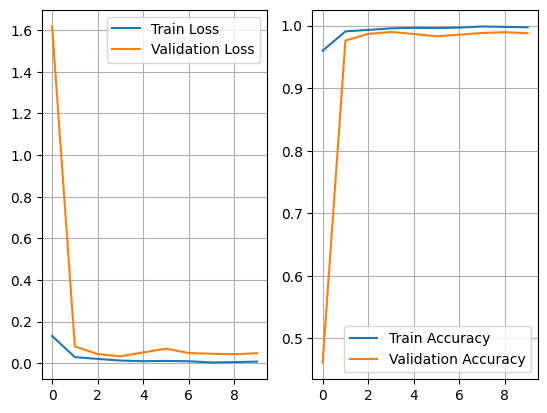

In [ ]:
# 훈련 결과
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_x,test_y, verbose = 2)
print("Test Loss : ",test_loss)
print("Test Accuracy : ",test_accuracy)

313/313 - 1s - 4ms/step - acc: 0.9879 - loss: 0.0483
Test Loss :  0.04834367334842682
Test Accuracy :  0.9879000186920166
